Part 1: Camera Calibration to find intrinsic parameters 

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import svd
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import mm3d_utils
import mmd3_plot
from calib_perfect import *
####
#!!!! As indicated in the pdf report, the order of the images uploaded in /content/img_ !!!!#
#!!!! is different from the one we had in our local environement, so the ply results    !!!!#
#!!!! will be different and unfortunately, the reconstruction bad ... The process is    !!!!#
#!!!! far too susceptible to any changes of any variables.                              !!!!#
####

# Path where the chessboard images used for calibration are stored
img_path = '/content/img_'

# Path where the camera parameters must be stored after calibration
cam_params = '/Users/clementsiegrist/untitled7/o_gl_3D/3D_rec_params.txt'

# Path where the interest points must me stored after homologous matching
points_path = '/content/interest_points.txt'

# Paths where the undistorted captured images are stored
capture_dir1 = '/content/capture_dir/0.png'
capture_dir2 = '/content/capture_dir/7.png'

# Paths where the undistorted captured images should be stored 
undistorted_img_path = '/content/undistorted_dir/1'
undistorted_img_path_ = '/content/undistorted_dir/2'

# Image size of the captured object
img_height, img_width = 1280, 720

# Aperture height and width of the MacBookPro2016 camera
a_heigth, a_width = 3888, 2430

# Calibrate the camera based on a folder of 14 images of a chessboard
retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, \
stdDeviationsExtrinsics, perViewErrors = calibratextended_findchess(img_path)

# Undistort 2 images of the previously capture object and store the results in the given path
new_cam, img_1 = undis_repro_(capture_dir1, undistorted_img_path, cameraMatrix, distCoeffs)
new_cam_, img_2 = undis_repro_(capture_dir2, undistorted_img_path_, cameraMatrix, distCoeffs)

# Obtain the focal lenght, the principal Point with cv2.
ovx, fovy, Focale, PrincipalPoint, aspectRatio = cv2.calibrationMatrixValues(cameraMatrix,
                                                                             imageSize=(img_width, img_height),
                                                                             apertureWidth=a_width,
                                                                             apertureHeight=a_heigth)
print('Focale is :', Focale)
print('PrincipalPoint is :', PrincipalPoint)
print('New camera matrix is :', new_cam)

OOOOK
ret is False
OOOOK
ret is False
OOOOK
ret is False
OOOOK
ret is True
OOOOK
OOOOK
OOOOK BEFORE CHESS
OOOOK AFTER CHEESSS
Focale is : 2941.5199335293296
PrincipalPoint is : (2322.1736861597788, 774.7672043600094)
New camera matrix is : [[1.01090839e+03 0.00000000e+00 6.35351025e+02]
 [0.00000000e+00 8.64842834e+02 2.36586034e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


<class 'list'> <class 'numpy.ndarray'> <class 'list'> <class 'numpy.ndarray'>
[<DMatch 0x7fc0c3828df0>, <DMatch 0x7fc0c2f1b4b0>, <DMatch 0x7fc0c2f1b950>, <DMatch 0x7fc0c2f1b970>, <DMatch 0x7fc0c281ca10>, <DMatch 0x7fc0c2f1b250>, <DMatch 0x7fc0c2f1b3d0>, <DMatch 0x7fc0c2c717f0>, <DMatch 0x7fc0c2f1b7b0>, <DMatch 0x7fc0c281c4d0>, <DMatch 0x7fc0c2f1b2d0>, <DMatch 0x7fc0c2c71830>, <DMatch 0x7fc0c3828e30>, <DMatch 0x7fc0c3828a70>, <DMatch 0x7fc0c2f1b230>, <DMatch 0x7fc0c2f1b470>, <DMatch 0x7fc0c281c6d0>, <DMatch 0x7fc0c281c890>, <DMatch 0x7fc0c2f1b1d0>, <DMatch 0x7fc0c2f1b390>, <DMatch 0x7fc0c2f1ba90>, <DMatch 0x7fc0c2c71fb0>, <DMatch 0x7fc0c281c210>, <DMatch 0x7fc0c281c630>, <DMatch 0x7fc0c281c090>, <DMatch 0x7fc0c281c850>, <DMatch 0x7fc0c281cbd0>, <DMatch 0x7fc0c2f1b6f0>, <DMatch 0x7fc0c2f1b7f0>, <DMatch 0x7fc0c2f1b8f0>, <DMatch 0x7fc0c281c470>, <DMatch 0x7fc0c3828e70>, <DMatch 0x7fc0c2f1ba50>, <DMatch 0x7fc0c281c5b0>, <DMatch 0x7fc0c281c750>, <DMatch 0x7fc0c281c5f0>, <DMatch 0x7fc0c2f1b89

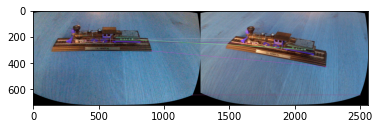

In [ ]:
# Paths where the undistorted captured images have been stored 
undistorted_img_path = '/content/undistorted_dir/1.png'
undistorted_img_path_ = '/content/undistorted_dir/2.png'

# save_coefficients(retval, cameraMatrix, distCoeffs, rvecs, tvecs, cam_params)
# This function calculates interest points and find the homologous points
p1, p2 = matches_img(undistorted_img_path, undistorted_img_path_, points_path)
TPtsVec = [p1, p2]

# You will have to reshape TPtsVec depending on the number of interest points found
TPtsVec = np.array(TPtsVec)
TPtsVec = np.reshape(TPtsVec, newshape=(208, 2, 2))

# Read the two undistorted images
aIm1 = cv2.imread(undistorted_img_path, cv2.IMREAD_IGNORE_ORIENTATION)
aIm2 = cv2.imread(undistorted_img_path_, cv2.IMREAD_IGNORE_ORIENTATION)
img1_points = p1 
img2_points = p2
NbPts = len(TPtsVec)

# Inverse distortion coefficients (k2,k4,k6)
CoeffDistInv = [0, 0, 0, 0]
# Center of distortion
CDist= [635.351025, 236.586034]
# Principal point
PrincipalPoint = PrincipalPoint
# Focal length
Focale = Focale

In [ ]:
# TODO Complete the function that calculates the radial distortion
def DistRadial(CDist,CoeffInv,P1) :

###########################
 Cx=P1[0]- CDist[0]
 Cy=P1[1]- CDist[1]
 rho2=np.square(Cx)+np.square(Cy)

 dist=0
 rhopower=rho2
 for itcoef in CoeffInv:
     dist+=itcoef * rhopower
     rhopower*=rho2

 return [ P1[0]+Cx*dist, P1[1]+Cy*dist ]

# Test your implementation
PTest = [436.030000,2454.980000]
PTestDist = DistRadial(CDist,CoeffDistInv,PTest)


In [ ]:
# TODO Complete the function that transforms a point to a bundle/direction
def DirBundle(PP, F, P):
        return [(P[0] - PP[0]) / F, (P[1] - PP[1]) / F]

vec = DirBundle(PrincipalPoint, Focale, PTestDist)

In [ ]:
# Normalise image observations (image points to direction)
def Transform2DirAll(TPtsVec) :
    Res = []
    for P1,P2 in TPtsVec :
        # TODO
        P1 = DistRadial(CDist, CoeffDistInv, P1)
        P1 = DirBundle(PrincipalPoint, Focale, P1)
        P2 = DistRadial(CDist, CoeffDistInv, P2)
        P2 = DirBundle(PrincipalPoint, Focale, P2) # CoeffDistInv
        Res.append([P1,P2])
    return Res

In [ ]:
results = Transform2DirAll(TPtsVec)
results = np.array(results)
Res = Transform2DirAll(TPtsVec)

In [ ]:
# TODO Calculate the sum of the residual errors
def CalcMatEssErr(MatE0):
    a, b, c, d, e, f, g, h = MatE0  # ith element is omitted because it is =0

    Res = Transform2DirAll(TPtsVec)
    #print('Second RES', Res)
    ResSom = 0
    for Pt1, Pt2 in Res:
        x1, y1 = Pt1
        x2, y2 = Pt2
        EX2 = a*x2 + b*y2 + c
        EY2 = d*x2 + e*y2 + f
        EZ2 = g*x2 + h*y2 + 1

        Res = x1*EX2 + y1*EY2 + EZ2
        ResSom += np.square(Res)
        # TODO
        # TODO
        #funct = lambda x: np.sum((x1, y1, 1) * np.array(MatE0) * np.array([x2, y2,1]).T)
        #minimize_ = minimize(funct, MatE0, method='Nelder-Mead', tol=1e-4)

    return ResSom

# Normalise image points to directions
TPtsDir = Transform2DirAll(TPtsVec)

# Initialize the essential matrix with zeros
E0 = [0,0,0,0,0,0,0,0]
#E0 = np.array(E0)
print("Residual error on E0 before minimization",CalcMatEssErr(E0))

E = minimize(CalcMatEssErr,E0,)
print("Residual error on E0 after minimization",CalcMatEssErr(E.x),"succes ?",E.success)

# Transform the vector to a matrix
EMat = mm3d_utils.TabToMatrix(E.x)
# Print the determinant of E
print("det E0",np.linalg.det(EMat))

# TODO   Calculate SVD Dec
R1, Vp, R2 = svd(EMat)

print(Vp)

# TODO Calculate E by enforcing constraint
E_constr = np.matmul(R1,np.matmul(np.diag([Vp[0],Vp[1],0]),R2))

# Print the determinant of E
print("det E",np.linalg.det(E_constr))

# Print the final Essential matrix
print("E",E_constr,Vp)

# TODO
Z = np.array([[0, 1, 0],[-1,0,0],[0,0,0]])
W = np.array([[0,-1,0],[1,0, 0],[0,0,1]])
#[[ 0.05047111], [-0.95877491], [ 0.2796486 ]]

# TODO - Decompose the E matrix to U D V^t with svd
U, D, Vt = svd(E_constr)

# TODO- calculate S
#S =
# TODO - Write the 2 solutions to translation and 2 solutions to rotation as camera to world transformations
# Translational part
C_Cam2_v1 = U.dot([[0],[0],[1]])
C_Cam2_v2 =  -U.dot([[0],[0],[1]])
# Rotational part
translation = U.dot([[0],[0],[1]])
RC2W_Cam2_v1 =  np.matmul(U,np.matmul(W,Vt))
RC2W_Cam2_v2 =  np.matmul(U,np.matmul(W.T,Vt))
print("RC2W_Cam2_v1", RC2W_Cam2_v1)

Residual error on E0 before minimization 208.0
Residual error on E0 after minimization 0.01119912490591284 succes ? True
det E0 -0.010405654750804379
[1.42104288e+01 4.42718233e-01 1.65399739e-03]
det E 0.0
E [[ 0.56504971  2.23038729  0.73682846]
 [ 1.3007072  13.04455402  3.0900788 ]
 [ 0.57910311  3.68197414  1.00117512]] [1.42104288e+01 4.42718233e-01 1.65399739e-03]
RC2W_Cam2_v1 [[-0.21185206 -0.92185746  0.3244958 ]
 [ 0.76013361  0.05326326  0.64758005]
 [ 0.61426021 -0.38385133 -0.6894509 ]]


In [ ]:
# TODO
def Cam2wtow2cam(R, C):

    ROut = np.linalg.inv(R)
    tOut = -np.matmul(ROut, C)
    return ROut, tOut

# Transform the camera to world into world to camera transformation
RCam2_v1,tCam2_v1 = Cam2wtow2cam(RC2W_Cam2_v1, C_Cam2_v1)
RCam2_v2,tCam2_v2 = Cam2wtow2cam(RC2W_Cam2_v1, C_Cam2_v2)
RCam2_v3,tCam2_v3 = Cam2wtow2cam(RC2W_Cam2_v2, C_Cam2_v1)
RCam2_v4,tCam2_v4 = Cam2wtow2cam(RC2W_Cam2_v2, C_Cam2_v2)
# print results

In [ ]:
# TODO
def Triangulation(R1, t1, R2, t2, TiePoints):

    P1 = np.ones([3,4],dtype=float)
    P2 = np.ones([3,4],dtype=float)

    P1[0:3, 0:3] = R1
    P1[0:3, 3:4] = t1
    #print("P1", P1)

    P2[0:3, 0:3] = R2
    P1[0:3, 3:4] = t2
    #print("P2", P2)
    Result = []

    for Pt1, Pt2 in TiePoints:
        x1, y1 = Pt1
        x2, y2 = Pt2

       #A
        A = np.zeros([4,4], dtype=float)
        A[0, 0:4] = x1*P1[2,:] - P1[0,:] #x1*p3t - pt2
        A[1, 0:4] = y1*P1[2,:] - P1[1,:]
        A[2, 0:4] = x2*P2[2,:] - P2[0,:]
        A[3, 0:4] = y2*P2[2,:] - P2[1,:]

        U, D, Vt = svd(A)
        V = Vt.T
        #print(Vt.transpose)
        #print(A[0:4, 3])
       #U, D Vt =svd(A)
        Result.append([V[0:3, 3]/V[3,3]])

    return Result

# TODO - Define the projection matrix for camera 1
RCam1 = np.eye(3,3, dtype=float)
tCam1 = [[0],[0],[0]]

In [ ]:
# TODO- Triangulate the points
Structure3D_v1 = Triangulation(RCam1,tCam1, RCam2_v1, tCam2_v1, TPtsDir)
Structure3D_v2 = Triangulation(RCam1,tCam1, RCam2_v2, tCam2_v2, TPtsDir)
Structure3D_v3 = Triangulation(RCam1,tCam1, RCam2_v3, tCam2_v3, TPtsDir)
Structure3D_v4 = Triangulation(RCam1,tCam1, RCam2_v4, tCam2_v4, TPtsDir)

print(Structure3D_v1[0][:])
print(Structure3D_v2[0][:])
print(Structure3D_v3[0][:])
print(Structure3D_v4[0][:])

# Get the intensity for each point
RGB = mm3d_utils.GetIntensity(TPtsVec, aIm1, aIm2)

[array([ 14.68141368,   3.41579365, -28.57465359])]
[array([-65.20376511, -20.3786532 , 133.66732822])]
[array([ 10.03867544,   2.54730225, -22.2029674 ])]
[array([ 23.72566232,   4.67105046, -51.75187677])]
ddd  (208, 2, 2)


In [ ]:
# Reshape the Structure3D in order to properly use SaveToPly function
Structure3D_v1 = np.asarray(Structure3D_v1).reshape(208, 3)
Structure3D_v2 = np.asarray(Structure3D_v2).reshape(208, 3)
Structure3D_v3 = np.asarray(Structure3D_v3).reshape(208, 3)
Structure3D_v4 = np.asarray(Structure3D_v4).reshape(208, 3)

# Save to ply
mm3d_utils.SaveToPly("/content/Structure3D1.ply", Structure3D_v1, RGB)
mm3d_utils.SaveToPly("/content/Structure3D2.ply", Structure3D_v2, RGB)
mm3d_utils.SaveToPly("/content/Structure3D3.ply", Structure3D_v3, RGB)
mm3d_utils.SaveToPly("/content/Structure3D4.ply", Structure3D_v4, RGB)

RGB VAL 208
RGB VAL 208
RGB VAL 208
RGB VAL 208
